In [1]:
import os
import time
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import (
    models,
    layers,
) 

import numpy as np
import random
from sklearn.metrics import confusion_matrix, classification_report

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
model_directory = 'models'

In [4]:
class RandomIntegers():
    def __init__(self):
        pass
    
    def generate(self, n, length):
        # Generate n unique random integers between 0 and length
        random_integers = random.sample(range(length), n)
        
        return random_integers

In [3]:
def generate( n, length):
    # Generate n unique random integers between 0 and length
    random_integers = random.sample(range(length), n)
    
    return random_integers

In [5]:
generate(10, 2000)

[1956, 935, 1550, 693, 1069, 1266, 1462, 678, 1451, 1646]

In [6]:
(x_train,y_train), (x_test, y_test)= mnist.load_data()

## Plot Dataset

Random Indexes:  [49037, 33534, 19645, 17114, 28835, 42652, 53575, 56525, 24506]


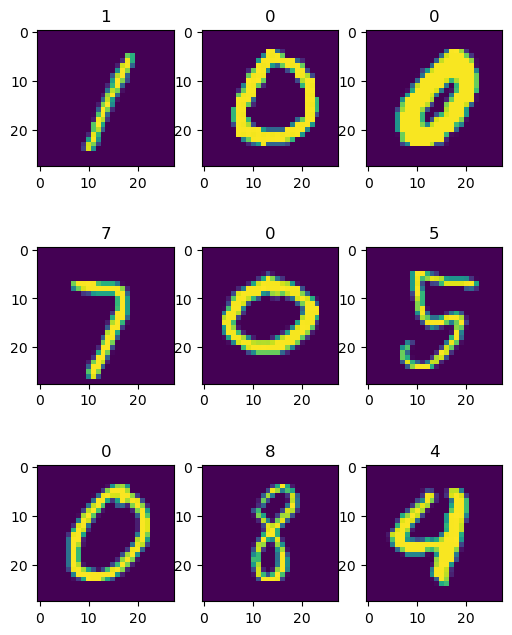

In [7]:
def display_images():
    random_integers = generate(9, len(x_train))
    print("Random Indexes: ",random_integers)
    plt.figure(figsize=(6, 8))
    counter = 0
    for i in random_integers:
        # define subplot
        plt.subplot(330 + 1 + counter)
        counter += 1
        # plot raw pixel data
        plt.imshow(x_train[i])
        plt.title(str(y_train[i]))
    # show the figure
    plt.show()
display_images()

Random Indexes:  [12436, 34506, 6608, 48801, 44620, 53540, 11854, 4631, 42370]


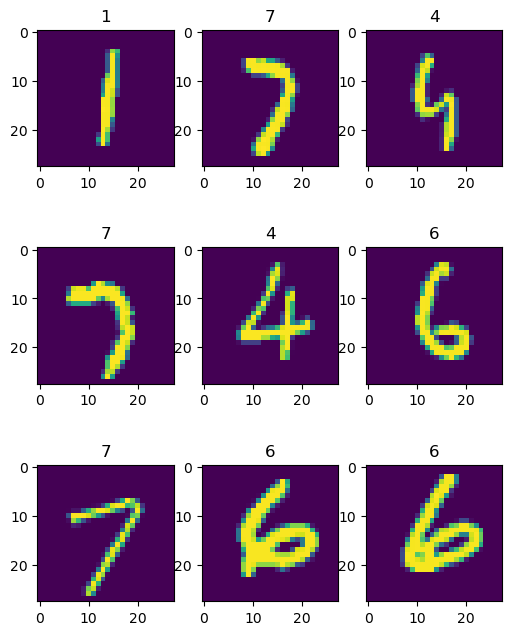

In [8]:
display_images()

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Build Model

In [16]:
model_dnn = tensorflow.keras.models.Sequential([
    
    tensorflow.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tensorflow.keras.layers.Dense(128, 
                                  activation='relu', 
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 ),
    # tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10, 
                                  activation='softmax',
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 )
])

In [16]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [17]:
dir(tf.keras.layers.Conv2D)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_causal_padding',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_dtype',
 '_eager_losses',
 '_expects_mask_arg',
 '_expects_training_arg',
 '_export_to_saved_model_graph',
 '_flatten',
 '_flatten_layers',
 '_flatten_modules',
 '_functional_construction_call',
 '

In [18]:
help(tf.keras.layers.Conv2D)

Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sampl

1, prediction :0.001
1, pred 0.999
0, prediction: 0.99
0, 0.01
Y log y_pred - (1-y)log(l-y_pred)

In [19]:
y_train[0]

5

In [20]:
[0,0,0,0,1,0,0,0,0,0]
[0,0,0,0,0,1,0,0,0,0]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
# tf.keras.losses.

### Compile the model

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

### Model Training

In [22]:
start_time = time.time()
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_test, y_test))
end_time = time.time()
total_time = end_time - start_time

print("Time taken for training: ", total_time, " seconds")

Epoch 1/25


/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 [==============================] - 3s 23ms/step - loss: 7.3694 - sparse_categorical_accuracy: 0.7272 - val_loss: 1.0712 - val_sparse_categorical_accuracy: 0.9004
Epoch 2/25
118/118 [==============================] - 2s 19ms/step - loss: 0.8852 - sparse_categorical_accuracy: 0.9267 - val_loss: 0.8438 - val_sparse_categorical_accuracy: 0.9410
Epoch 3/25
118/118 [==============================] - 2s 18ms/step - loss: 0.6971 - sparse_categorical_accuracy: 0.9527 - val_loss: 0.7635 - val_sparse_categorical_accuracy: 0.9569
Epoch 4/25
118/118 [==============================] - 2s 18ms/step - loss: 0.6076 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.7987 - val_sparse_categorical_accuracy: 0.9640
Epoch 5/25
118/118 [==============================] - 2s 18ms/step - loss: 0.6176 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6073 - val_sparse_categorical_accuracy: 0.9744
Epoch 6/25
118/118 [==============================] - 2s 18ms/step - loss: 0.6284 - sparse_categorical_acc

### Plot Accuracy

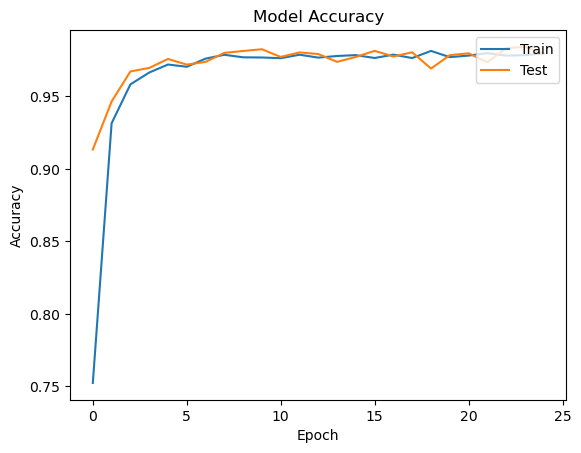

In [23]:
# Plot the accuracy from the training history
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Plot loss

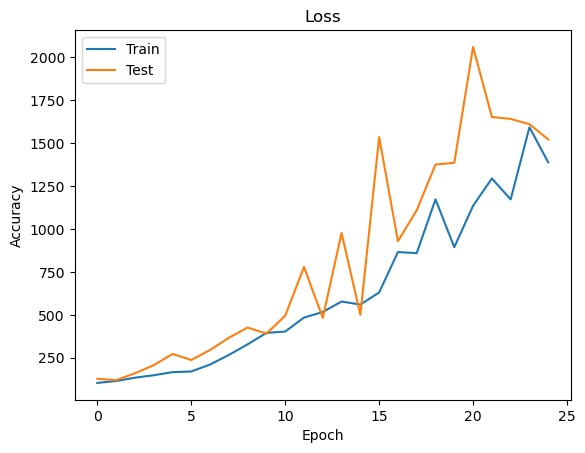

In [29]:
# Plot the accuracy from the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Save Model

In [23]:
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory,"model_mnist_cnn.h5")
model.save(model_path)

/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [31]:
10*64 + 10

650

In [29]:
# Get the true labels and predicted labels for the test dataset
true_labels = y_test
predicted_labels = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


### Confusion Matrix

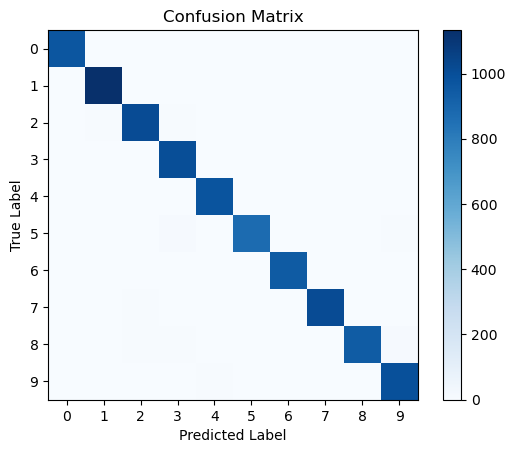

In [30]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [32]:
cm

array([[ 967,    1,    2,    0,    1,    1,    4,    2,    2,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,    5, 1012,    6,    1,    0,    1,    3,    3,    1],
       [   0,    0,    1, 1003,    0,    4,    0,    0,    2,    0],
       [   0,    1,    0,    0,  977,    0,    1,    1,    1,    1],
       [   2,    0,    0,    9,    0,  872,    1,    1,    1,    6],
       [   2,    3,    0,    0,    3,    4,  944,    0,    2,    0],
       [   0,    4,    6,    0,    0,    0,    0, 1013,    1,    4],
       [   4,    0,    7,    5,    1,    2,    1,    4,  940,   10],
       [   2,    0,    0,    2,    6,    2,    0,    1,    1,  995]])

### Classification Report

In [33]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=cifar_10_labels.values(),)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    airplane       0.99      0.99      0.99       980
  automobile       0.99      1.00      0.99      1135
        bird       0.98      0.98      0.98      1032
         cat       0.98      0.99      0.99      1010
        deer       0.99      0.99      0.99       982
         dog       0.99      0.98      0.98       892
        frog       0.99      0.99      0.99       958
       horse       0.99      0.99      0.99      1028
        ship       0.99      0.97      0.98       974
       truck       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

